In [ ]:
#@title
%matplotlib inline

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading and Preparing for EDA and Model Building

In [ ]:
#@title
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# define directory
dir = '/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data'  # replace with your folder path

# create generator
datagen = ImageDataGenerator(rescale=1.0/255.0)  # rescale pixel values to [0,1], you can add more preprocessing here

# prepare an iterator for the dataset
generator = datagen.flow_from_directory(dir, class_mode='categorical', batch_size=64, target_size=(200, 200)) # set the target_size to the size of your images

# total number of samples
total_samples = generator.samples
print(f'Total samples: {total_samples}')

# number of classes
num_classes = generator.num_classes
print(f'Number of classes: {num_classes}')

# class labels
class_labels = list(generator.class_indices.keys())
print(f'Class labels: {class_labels}')

# size and format of first image
first_image_path = os.path.join(dir, class_labels[0], os.listdir(os.path.join(dir, class_labels[0]))[0])
first_image = Image.open(first_image_path)
print(f'First image format: {first_image.format}')
print(f'First image size: {first_image.size}')  # size in pixels

# count of samples per class
class_counts = {}
for class_label in class_labels:
    class_counts[class_label] = len(os.listdir(os.path.join(dir, class_label)))
print(f'Class counts: {class_counts}')

Found 5631 images belonging to 4 classes.
Total samples: 5631
Number of classes: 4
Class labels: ['cloudy', 'desert', 'green_area', 'water']
First image format: JPEG
First image size: (256, 256)
Class counts: {'cloudy': 1500, 'desert': 1131, 'green_area': 1500, 'water': 1500}


# Sample Images

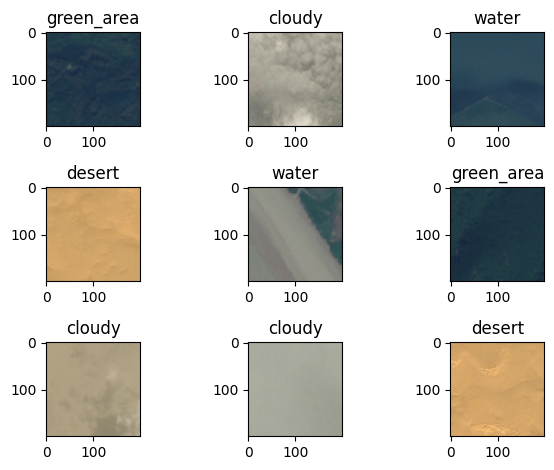

In [ ]:
#@title
# get label to class_id mapping
label_map = (train_generator.class_indices)

# reverse it to get class_id to label mapping
id_to_label_map = {v: k for k, v in label_map.items()}

# get a batch of data
X_batch, y_batch = next(train_generator)

# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_batch[i])
    plt.title(id_to_label_map[np.argmax(y_batch[i])]) #get the label corresponding to the class_id
plt.tight_layout()
plt.show()

# Class Distribution and Data Size

cloudy: 1500 samples, 10.25 MB
green area: 1500 samples, 3.75 MB
water: 1500 samples, 2.38 MB
desert: 1131 samples, 5.16 MB


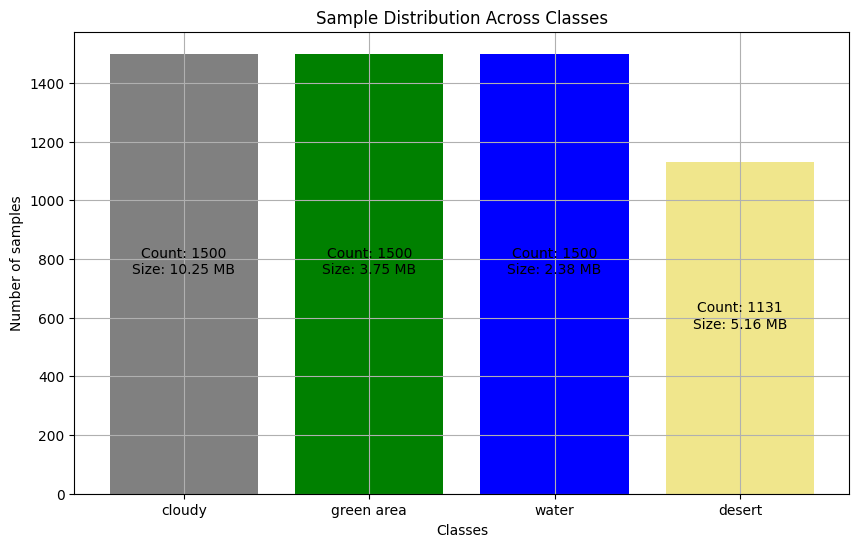

In [ ]:
#@title
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define your class directories and corresponding colors
class_dirs = {
    "cloudy": {
        "path": "/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/cloudy",
        "color": "gray"
    },
    "green area": {
        "path": "/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/green_area",
        "color": "green"
    },
    "water": {
        "path": "/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/water",
        "color": "blue"
    },
    "desert": {
        "path": "/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/desert",
        "color": "khaki"
    }
}

# Function to calculate size of images in a directory in MB
def get_dir_size(path):
    total = 0
    with os.scandir(path) as it:
        for entry in it:
            if entry.is_file():
                total += entry.stat().st_size
            elif entry.is_dir():
                total += get_dir_size(entry.path)
    return total / (1024 * 1024)  # size in MB

# Gather data for histogram
class_names = []
class_counts = []
class_sizes = []
class_colors = []
for class_name, info in class_dirs.items():
    path = info["path"]
    color = info["color"]

    count = len(os.listdir(path))
    size = get_dir_size(path)

    class_names.append(class_name)
    class_counts.append(count)
    class_sizes.append(size)
    class_colors.append(color)

    print(f"{class_name}: {count} samples, {size:.2f} MB")

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color=class_colors)
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.title('Sample Distribution Across Classes')
plt.grid(True)
for i in range(len(class_names)):
    plt.text(i, class_counts[i]//2, f'Count: {class_counts[i]}\nSize: {class_sizes[i]:.2f} MB', ha = 'center')
plt.show()

# Color/RGB Channel and Pixel Density Distribution Overview

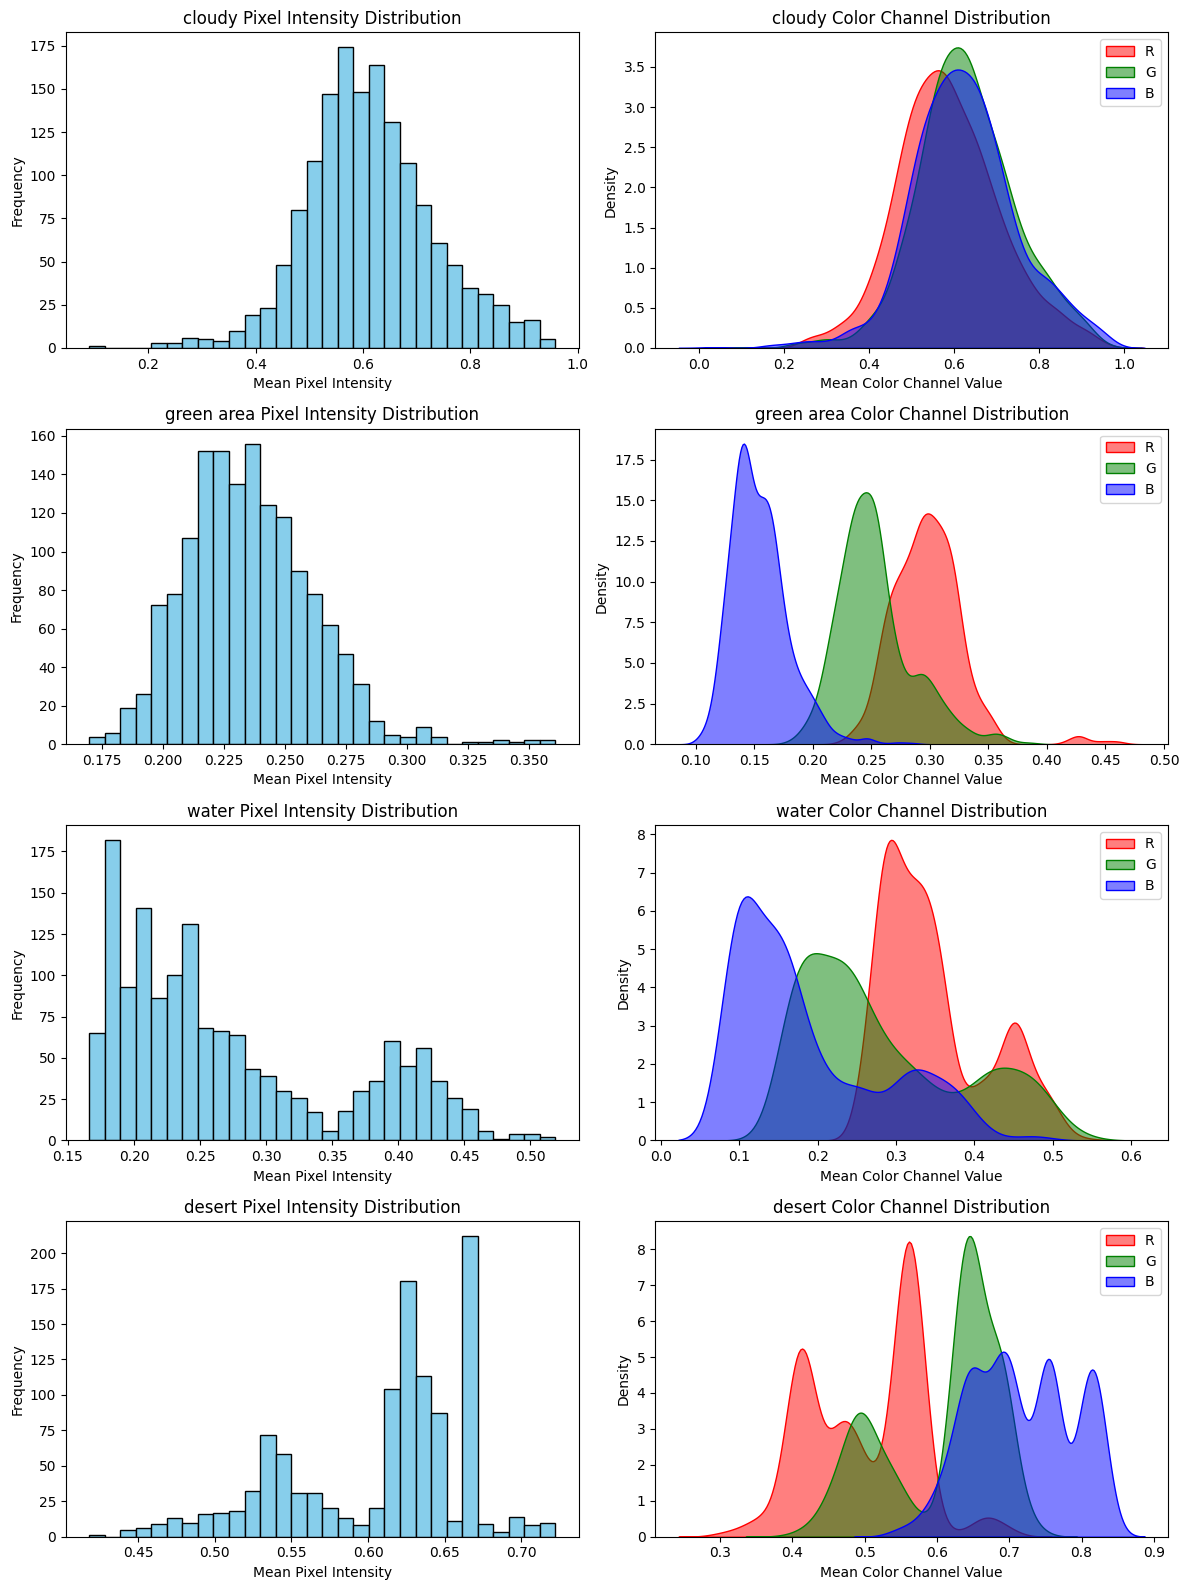

In [ ]:
#@title
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the classes and their respective directories
classes = ['cloudy', 'green area', 'water', 'desert']
directories = ['/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/cloudy', '/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/green_area', '/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/water', '/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/desert']

fig, ax = plt.subplots(4, 2, figsize=(12, 16))

# Iterate over each class
for i in range(len(classes)):
    # Initialize lists to store pixel intensities and color channel values
    pixel_intensities = []
    color_channels = {'R': [], 'G': [], 'B': []}

    # Iterate over each image in the directory for the class
    for filename in os.listdir(directories[i]):
        img = cv2.imread(os.path.join(directories[i], filename))
        img = img / 255.0  # normalize pixel values

        # Add the mean pixel intensity of the image to the list
        pixel_intensities.append(np.mean(img))

        # Add the mean value of each color channel to the respective list
        color_channels['R'].append(np.mean(img[:,:,0]))
        color_channels['G'].append(np.mean(img[:,:,1]))
        color_channels['B'].append(np.mean(img[:,:,2]))

    # Plot histogram of pixel intensities for the class
    ax[i, 0].hist(pixel_intensities, bins=30, color='skyblue', edgecolor='black')
    ax[i, 0].set_title(f'{classes[i]} Pixel Intensity Distribution')
    ax[i, 0].set_xlabel('Mean Pixel Intensity')
    ax[i, 0].set_ylabel('Frequency')

   # Correct color mapping
    color_mapping = {'R': 'red', 'G': 'green', 'B': 'blue'}

   # Plot KDE of color channel values for the class
    for channel in color_channels:
        sns.kdeplot(color_channels[channel], color=color_mapping[channel], fill=True, alpha=0.5, label=channel, ax=ax[i, 1])

    ax[i, 1].set_title(f'{classes[i]} Color Channel Distribution')
    ax[i, 1].set_xlabel('Mean Color Channel Value')
    ax[i, 1].set_ylabel('Density')
    ax[i, 1].legend()

plt.tight_layout()
plt.show()

#Further Descriptive Statistics on Pixel Density

In [ ]:
#@title
import plotly.graph_objects as go
import cv2
import os
import numpy as np
import pandas as pd

# Define the classes and their respective directories
classes = ['cloudy', 'green area', 'water', 'desert']
directories = ['/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/cloudy',
               '/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/green_area',
               '/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/water',
               '/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/desert']

# Initialize the plotly figure
fig = go.Figure()

# Initialize a list to store the visibility state for each trace
visibility_state = []

# Iterate over each class
for i in range(len(classes)):
    # Initialize lists to store pixel intensities and color channel values
    pixel_intensities = []

    # Iterate over each image in the directory for the class
    for filename in os.listdir(directories[i]):
        img = cv2.imread(os.path.join(directories[i], filename))
        img = img / 255.0  # normalize pixel values

        # Add the mean pixel intensity of the image to the list
        pixel_intensities.append(np.mean(img))

    # Create DataFrame for pixel intensities
    df_intensities = pd.DataFrame(pixel_intensities, columns=['intensity'])

    # Add a violin plot for pixel intensities to the figure
    fig.add_trace(go.Violin(y=df_intensities['intensity'],
                            name=f'{classes[i]} Pixel Intensity',
                            box_visible=True,
                            meanline_visible=True))
    visibility_state.append([True if j == i else False for j in range(len(classes))])

# Define the dropdown menu
dropdown = []
for i in range(len(classes)):
    dropdown.append(dict(args = [{"visible": visibility_state[j]} for j in range(i, i+1)],
                          label=classes[i],
                          method="update"))

fig.update_layout(updatemenus=[go.layout.Updatemenu(buttons=list(dropdown), direction="down", pad={"r": 10, "t": 10}, showactive=True, x=0.1, xanchor="left", y=1.1, yanchor="top")])

# Show the figure
fig.show()

# Further Detailed Descptive Statistics of Color Distribution

In [ ]:
#@title
import plotly.graph_objects as go
import cv2
import os
import numpy as np
import pandas as pd

# Define the classes and their respective directories
classes = ['cloudy', 'green area', 'water', 'desert']
directories = ['/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/cloudy',
               '/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/green_area',
               '/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/water',
               '/content/drive/MyDrive/DSPT10PT_Sophie_Emily_Project/data/desert']

# Initialize the plotly figure
fig = go.Figure()

# Initialize a list to store the visibility state for each trace
visibility_state = []

# Iterate over each class
for i in range(len(classes)):
    # Initialize lists to store pixel intensities and color channel values
    pixel_intensities = []
    color_channels = {'R': [], 'G': [], 'B': []}

    # Iterate over each image in the directory for the class
    for filename in os.listdir(directories[i]):
        img = cv2.imread(os.path.join(directories[i], filename))
        img = img / 255.0  # normalize pixel values

        # Add the mean pixel intensity of the image to the list
        pixel_intensities.append(np.mean(img))

        # Add the mean value of each color channel to the respective list
        color_channels['R'].append(np.mean(img[:,:,0]))
        color_channels['G'].append(np.mean(img[:,:,1]))
        color_channels['B'].append(np.mean(img[:,:,2]))

    # Create DataFrames for pixel intensities and color channels
    df_intensities = pd.DataFrame(pixel_intensities, columns=['intensity'])
    df_colors = pd.DataFrame(color_channels)

    # Add a violin plot for pixel intensities to the figure
    fig.add_trace(go.Violin(y=df_intensities['intensity'],
                            name=f'{classes[i]} Pixel Intensity',
                            box_visible=True,
                            meanline_visible=True))
    visibility_state.append([True if j == i else False for j in range(len(classes))])

    # Add a violin plot for each color channel to the figure
    for channel in color_channels:
        fig.add_trace(go.Violin(y=df_colors[channel],
                                name=f'{classes[i]} {channel} Channel',
                                box_visible=True,
                                meanline_visible=True))
    visibility_state.append([True if j == i+len(classes) else False for j in range(len(classes), len(classes)*2)])

# Define the dropdown menu
dropdown = []
for i in range(len(classes)):
    dropdown.append(dict(args = [{"visible": visibility_state[j]} for j in range(i*2, i*2+2)],
                          label=classes[i],
                          method="update"))

fig.update_layout(updatemenus=[go.layout.Updatemenu(buttons=list(dropdown), direction="down", pad={"r": 10, "t": 10}, showactive=True, x=0.1, xanchor="left", y=1.1, yanchor="top")])

# Show the figure
fig.show()